In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
beml_df = pd.read_csv("BEML.csv")
beml_df.head()
#beml_df[0:5]    # another way to view top rows

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1134.60,-0.000881
1,2010-01-06,2010-01-06,1139.60,0.004407
2,2010-01-07,2010-01-07,1144.15,0.003993
3,2010-01-08,2010-01-08,1144.05,-0.000087
4,2010-01-11,2010-01-11,1137.00,-0.006162


In [3]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Date.1,Close,gain
0,2010-01-05,2010-01-05,1616.80,-0.005444
1,2010-01-06,2010-01-06,1638.50,0.013422
2,2010-01-07,2010-01-07,1648.70,0.006225
3,2010-01-08,2010-01-08,1639.80,-0.005398
4,2010-01-11,2010-01-11,1629.45,-0.006312


In [4]:
beml_df['Date']    #SERIES/ARRAY VIEW

0       2010-01-05
1       2010-01-06
2       2010-01-07
3       2010-01-08
4       2010-01-11
           ...    
1733    2016-12-26
1734    2016-12-27
1735    2016-12-28
1736    2016-12-29
1737    2016-12-30
Name: Date, Length: 1738, dtype: object

In [5]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [6]:
beml_df

,Date,Close
0,2010-01-05,1134.60
1,2010-01-06,1139.60
2,2010-01-07,1144.15
3,2010-01-08,1144.05
4,2010-01-11,1137.00
...,...,...
1733,2016-12-26,950.25
1734,2016-12-27,975.70
1735,2016-12-28,974.40
1736,2016-12-29,986.05


In [7]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''

'The DataFrames have a date column, so we can\ncreate a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in\nascending order.'

In [8]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))   #INDEX AND COL 'Date' #Datatype of Date object to datetime 
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

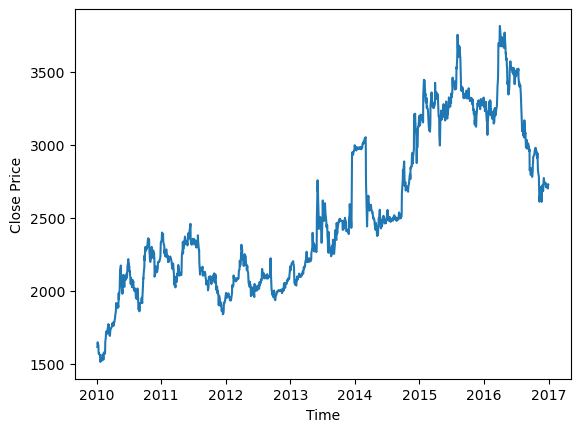

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn  
%matplotlib inline

#plot Glaxo   Glaxo is low risk 
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

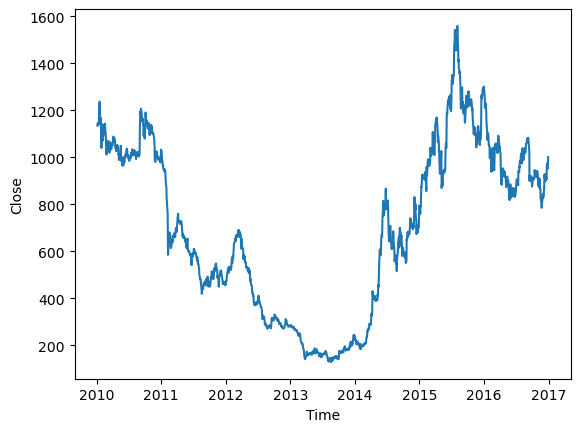

In [10]:
#plot BEML     BEML is high risk
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [11]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)    #period= to get each  day/each month; '1' indicate each day
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [12]:
beml_df['gain']   #gain of BEML 

Date
2010-01-05         NaN
2010-01-06    0.004407
2010-01-07    0.003993
2010-01-08   -0.000087
2010-01-11   -0.006162
                ...   
2016-12-26   -0.021924
2016-12-27    0.026782
2016-12-28   -0.001332
2016-12-29    0.011956
2016-12-30    0.014756
Name: gain, Length: 1738, dtype: float64

In [13]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()    
beml_df = beml_df.dropna()

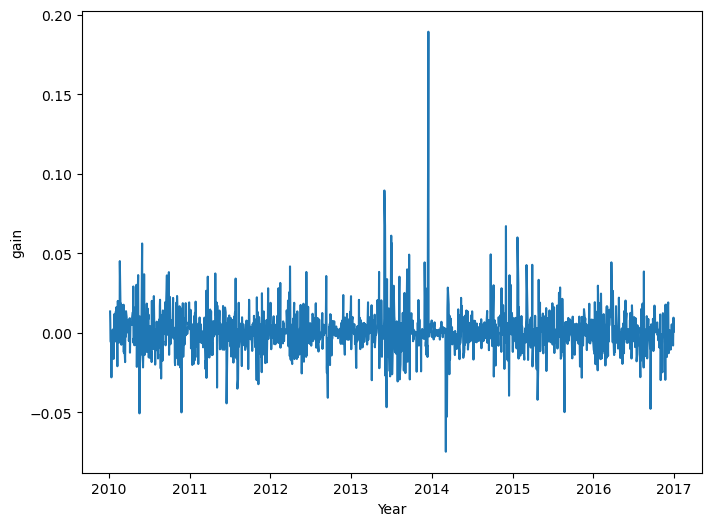

In [14]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Year');
plt.ylabel('gain');

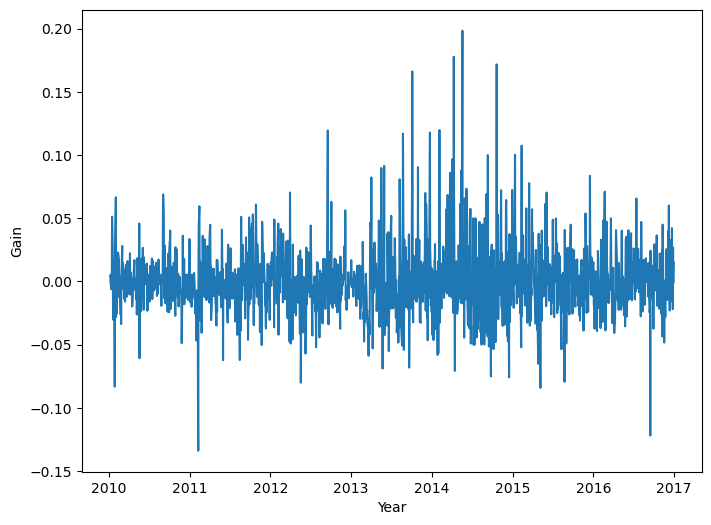

In [15]:
#Plot the gains   BEML has high variance
plt.figure(figsize = (8, 6));
plt.plot(beml_df.index,beml_df.gain);
plt.xlabel('Year');
plt.ylabel('Gain');

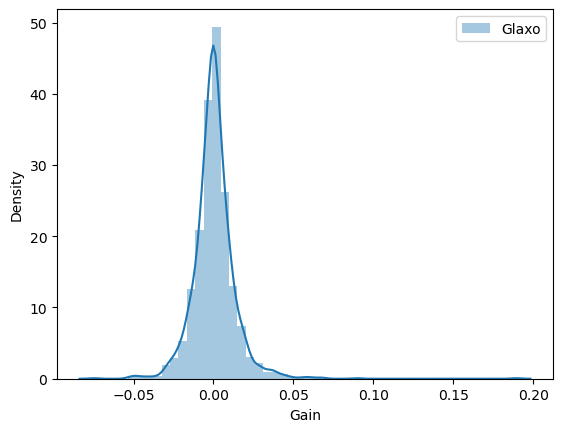

In [16]:
# Seaborn used for histo plot
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('Gain');
plt.ylabel('Density');
plt.legend();

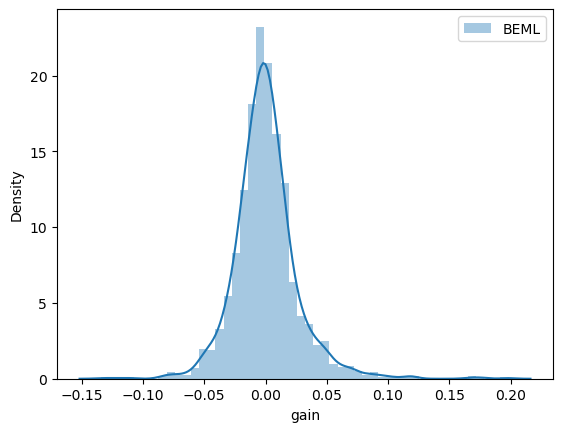

In [17]:
sns.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
#plt.ylabel('Density');
plt.legend();

## Mean and std shows stocks are close in gain and loss 

In [18]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [19]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [20]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06353789851454293

In [21]:
#Probability of making 2% gain or higher in Glaxo
#positive probability is subtracted from '1' since we calculating profit
1 - stats.norm.cdf(0.02,
loc= glaxo_df.gain.mean(),
scale= glaxo_df.gain.std())

0.07112572432274356

### Compute 2% loss or gain for BEML

In [22]:
#Probability of making 2% loss or higher in BEML
stats.norm.cdf(-0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())

0.2216179428118762

In [23]:
#Probability of making 2% gain or higher in BEML
#positive probability is subtracted from '1' since we calculating profit
1 - stats.norm.cdf(0.02, loc= beml_df.gain.mean(), scale= beml_df.gain.std())

0.2277706340605088

In [24]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02, loc=beml_df.gain.mean(), scale=beml_df.gain.std())

0.2277706340605088